## Project CS_677

## Time Series Analysis Superstore sales

In [328]:
df = pd.read_excel("C:/Users/chait/Downloads/Superstore.xls")
furniture = df.loc[df['Category'] == 'Furniture']

In [329]:
import calendar

In [330]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [331]:
df.columns


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [332]:
df['Ship Date'].min()

Timestamp('2014-01-07 00:00:00')

In [333]:
furniture.isnull().any()

Row ID           False
Order ID         False
Order Date       False
Ship Date        False
Ship Mode        False
Customer ID      False
Customer Name    False
Segment          False
Country          False
City             False
State            False
Postal Code      False
Region           False
Product ID       False
Category         False
Sub-Category     False
Product Name     False
Sales            False
Quantity         False
Discount         False
Profit           False
dtype: bool

In [206]:
#Selecting Furniture sales for analysis

In [207]:
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [209]:
y = furniture['Sales'].resample('MS').mean()

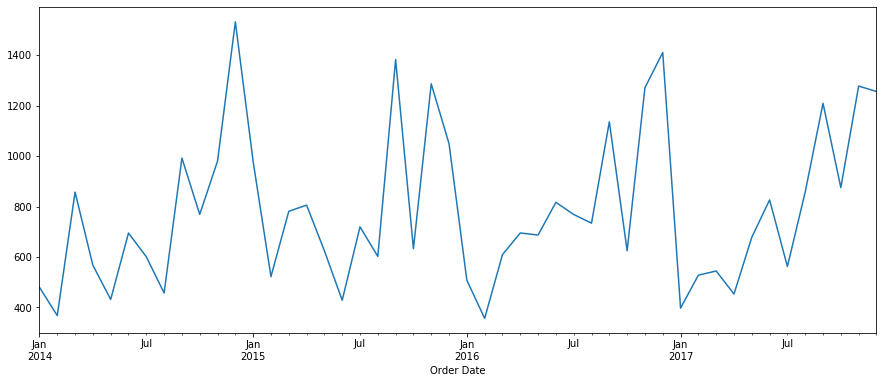

In [214]:
y.plot(figsize=(15, 6))
plt.show()

Sales has a cold start and Maximum sales appear at the end of year

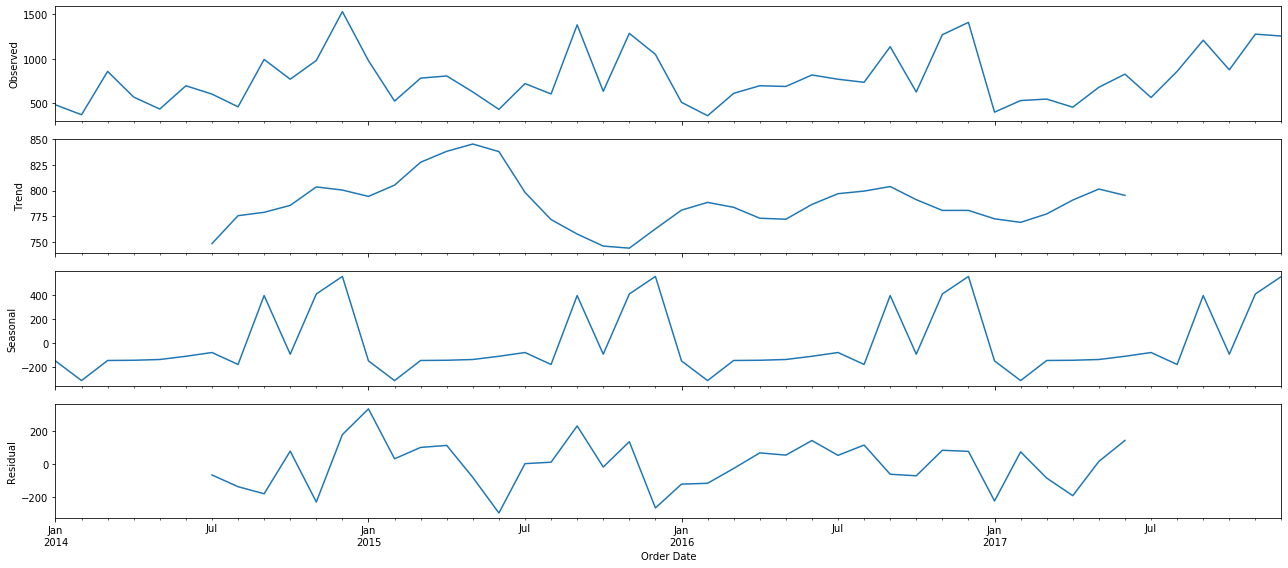

In [217]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

The plot above clearly shows that the sales of furniture is unstable, along with its obvious seasonality.

In [227]:
#analysing daily sales rate
daily = furniture['Sales'].resample('D').sum()  
daily

Order Date
2014-01-06    2573.8200
2014-01-07      76.7280
2014-01-08       0.0000
2014-01-09       0.0000
2014-01-10      51.9400
                ...    
2017-12-26       0.0000
2017-12-27       0.0000
2017-12-28     551.2568
2017-12-29    2330.7180
2017-12-30     323.1360
Freq: D, Name: Sales, Length: 1455, dtype: float64

In [228]:
daily_rolling = daily.rolling(30).mean()
daily_rolling

Order Date
2014-01-06            NaN
2014-01-07            NaN
2014-01-08            NaN
2014-01-09            NaN
2014-01-10            NaN
                 ...     
2017-12-26    1251.629733
2017-12-27    1249.437067
2017-12-28    1112.507627
2017-12-29    1173.801960
2017-12-30    1046.915560
Freq: D, Name: Sales, Length: 1455, dtype: float64

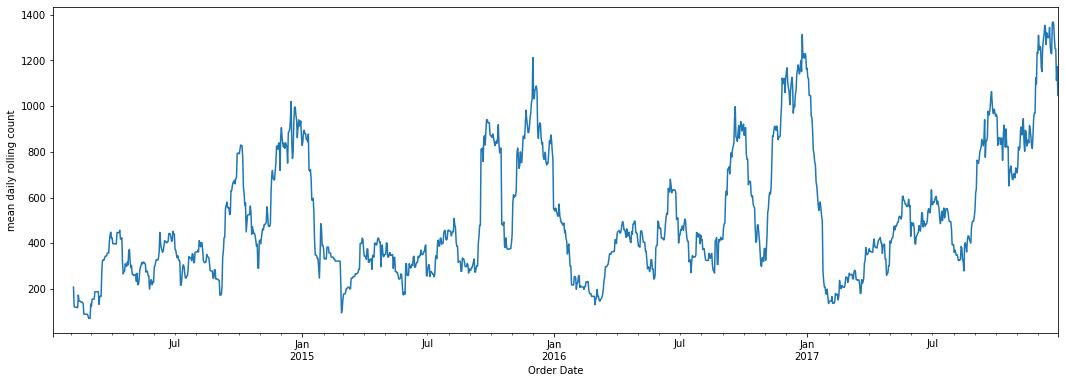

In [257]:
fig, ax = plt.subplots(figsize=(18,6))
daily_rolling.plot(style=['-'], ax=ax);
plt.ylabel('mean daily rolling count');

It is obvious that sales were better in 2017 with a frame of 30 days

In [243]:
weekly = furniture['Sales'].resample('W').sum()
weekly

Order Date
2014-01-12     2712.4280
2014-01-19     1250.4730
2014-01-26     1655.9580
2014-02-02      623.6660
2014-02-09       14.5600
                 ...    
2017-12-03    16008.1720
2017-12-10     8794.4040
2017-12-17     4639.8190
2017-12-24     7274.0430
2017-12-31     4037.5648
Freq: W-SUN, Name: Sales, Length: 208, dtype: float64

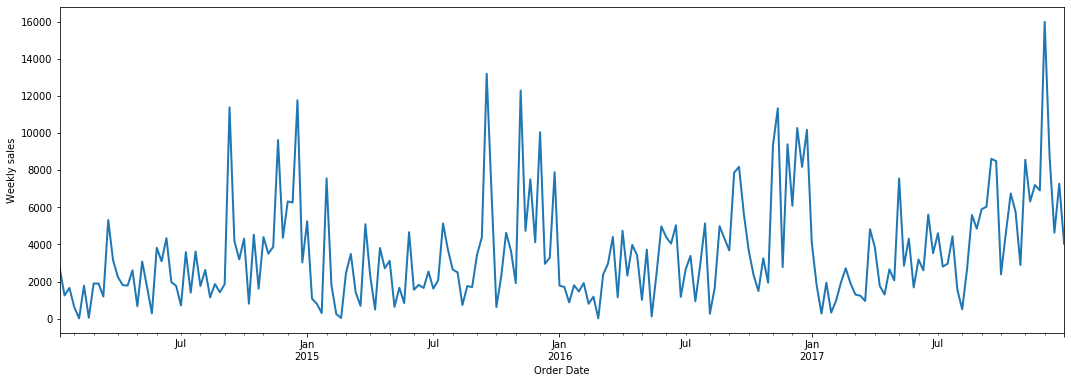

In [237]:
fig, ax = plt.subplots(figsize=(18,6))
weekly.plot(style=['-'], ax=ax, lw=2)
plt.ylabel('Weekly sales');

2015 had more weeks with peak sales while as 2017 had highest weekly sales

### Heart Disease Analysis

In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data=pd.read_csv('C:/Users/chait/Documents/677 Python/heart-disease-uci/heart.csv')

In [8]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
data.target.unique()

array([1, 0], dtype=int64)

In [10]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
data.shape

(303, 14)

In [12]:
data.isnull().values.any()

False

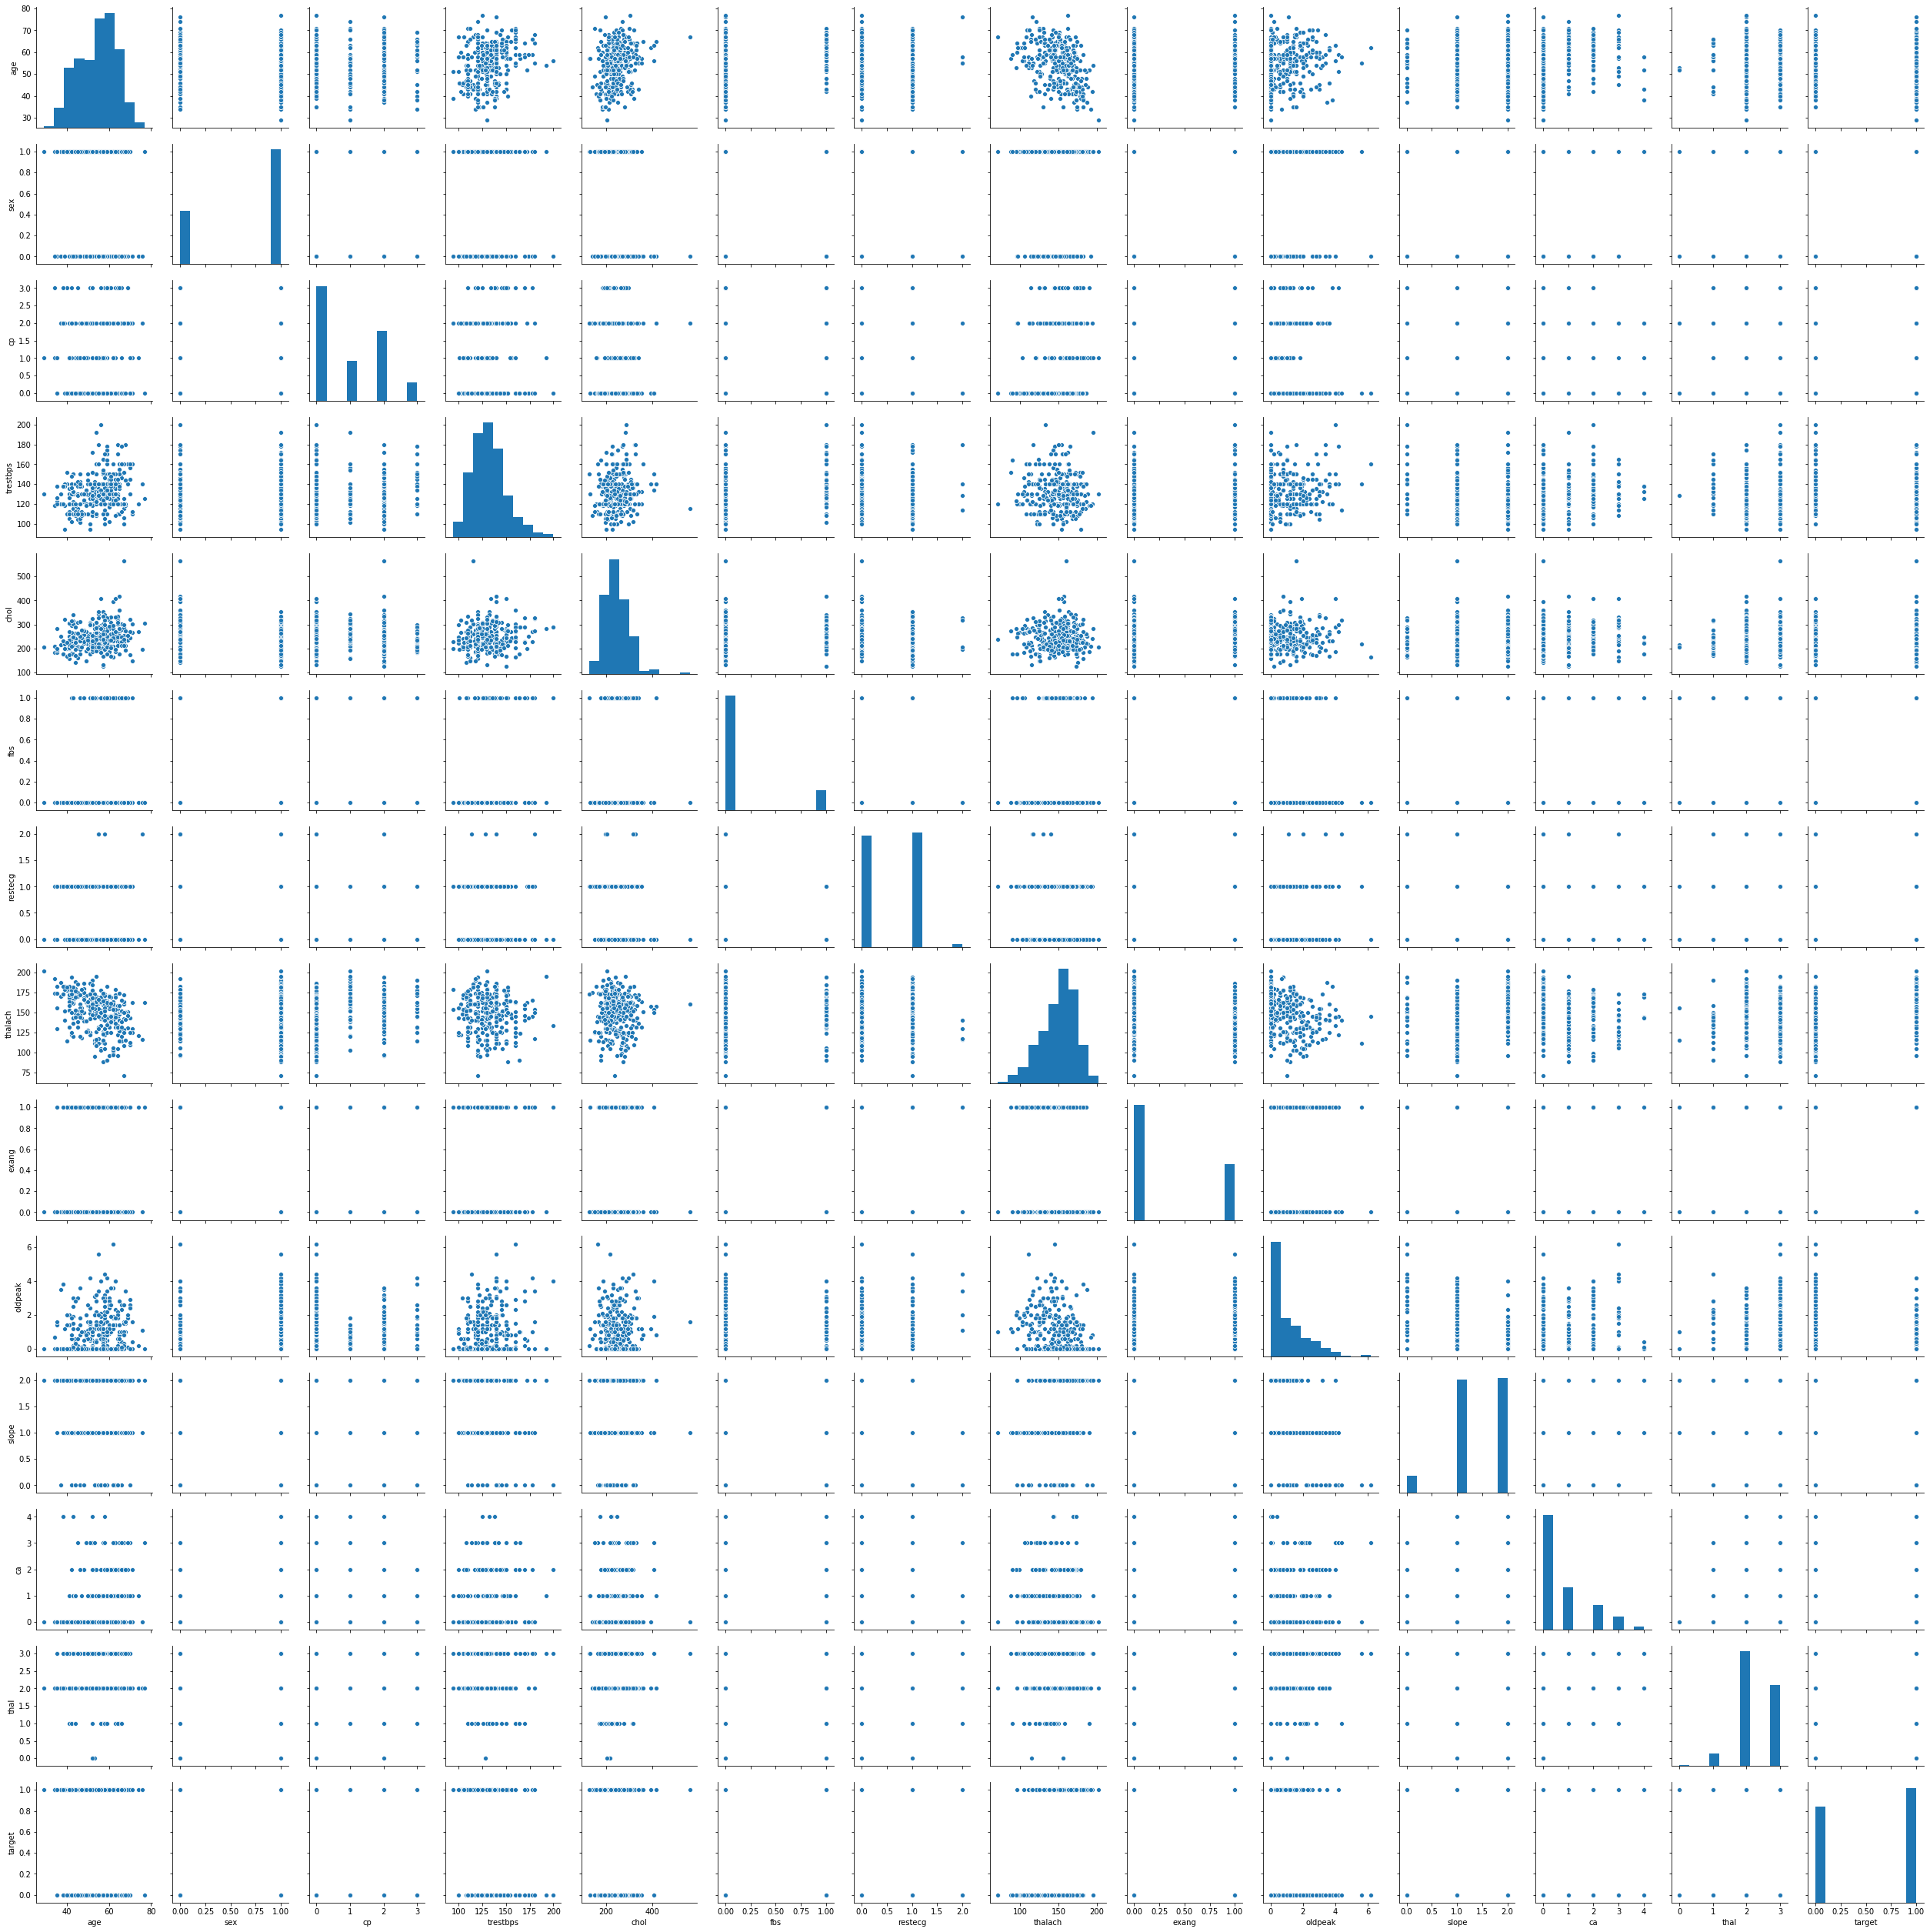

In [13]:
sns.pairplot(data)
plt.show()

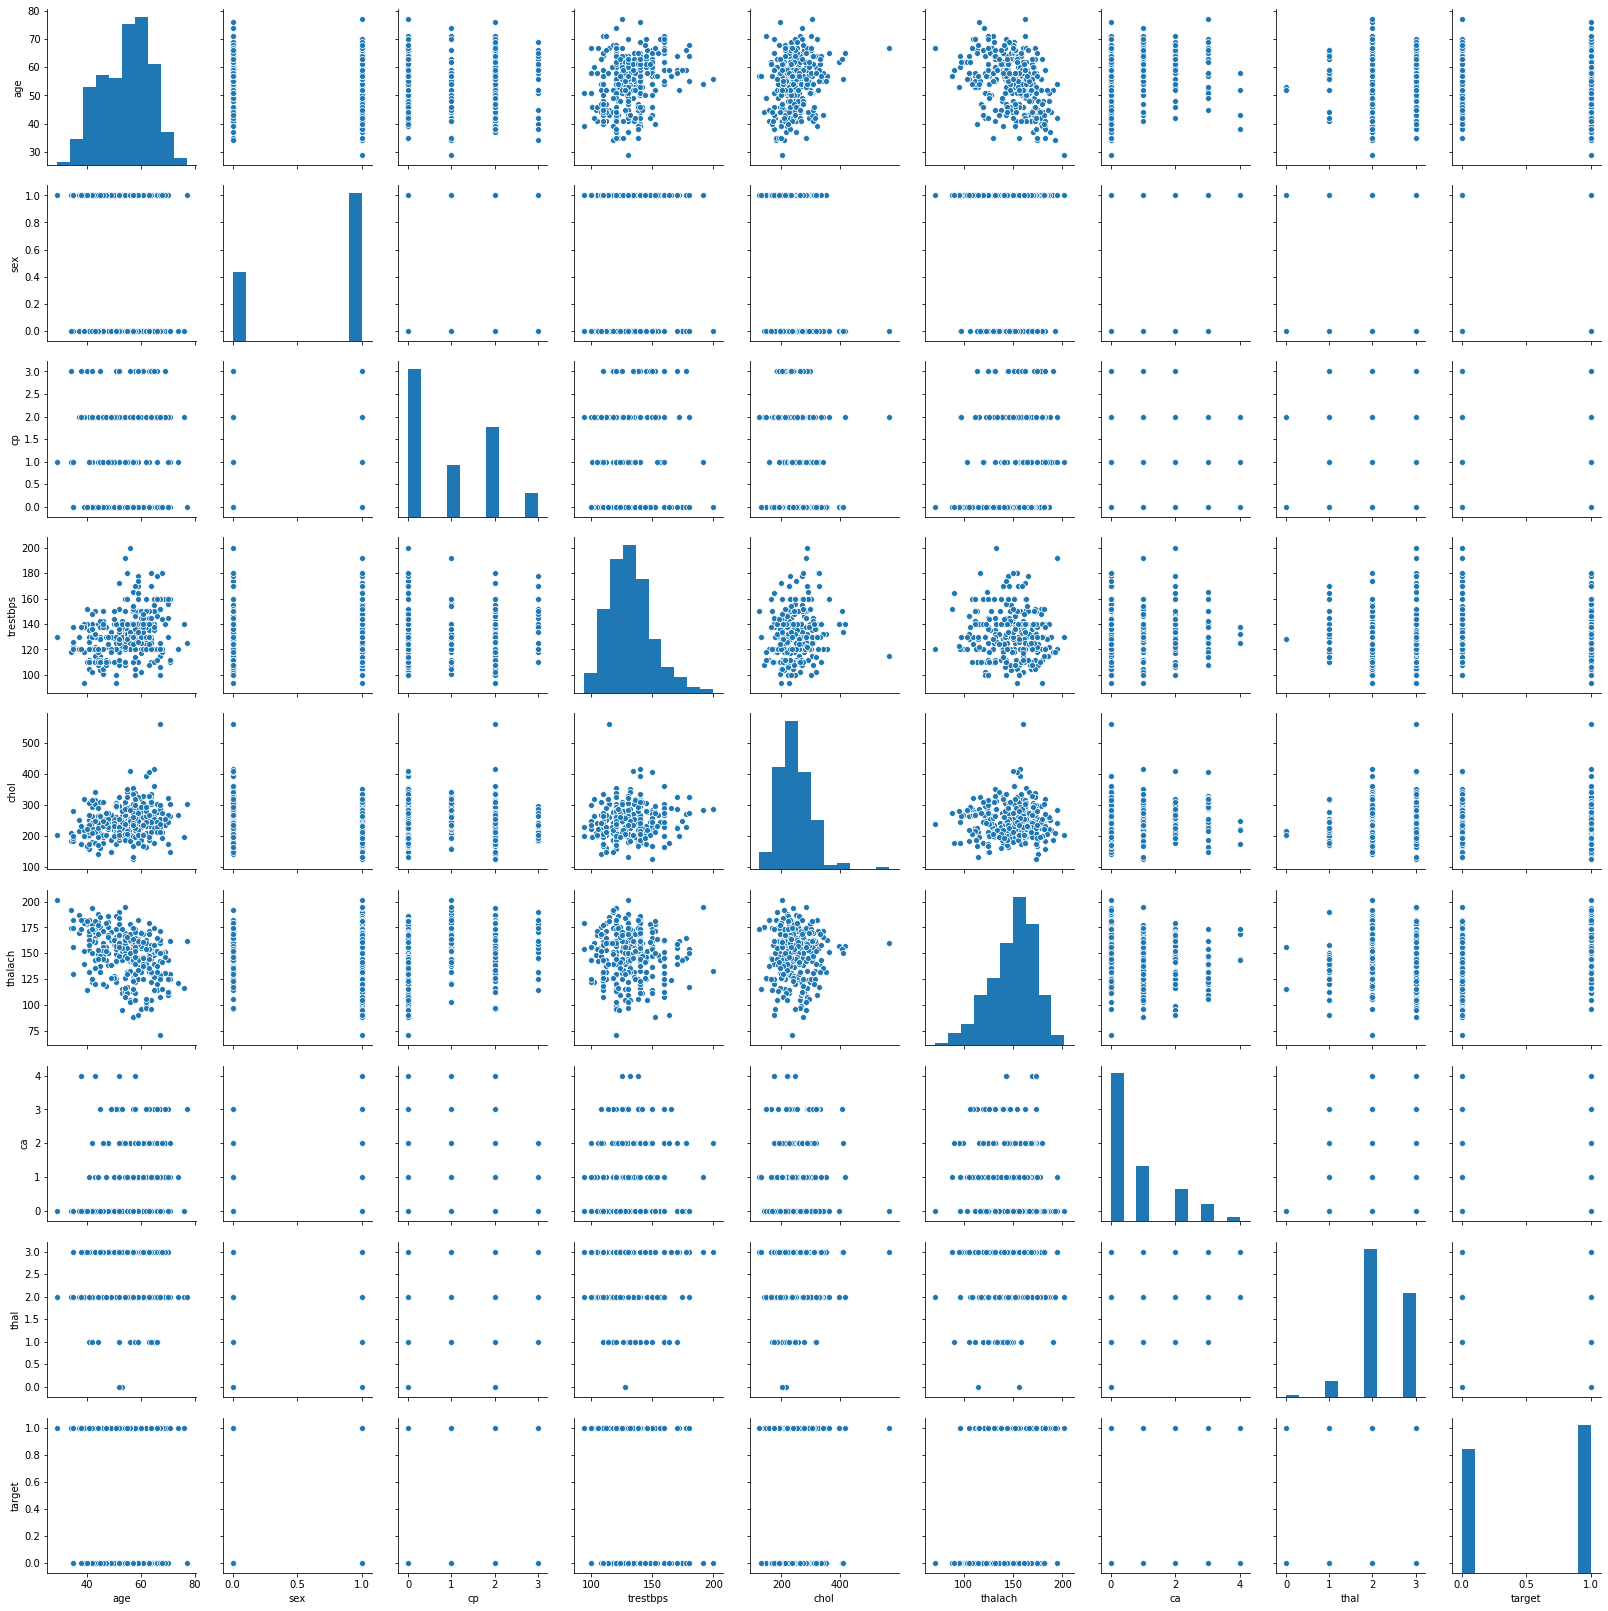

In [258]:
col=["age","sex","cp","trestbps","chol","thalach","ca","thal","target"]
sns.pairplot(data[col])
plt.show()

In [15]:
data.age.unique()

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77], dtype=int64)

In [16]:
data.cp.unique()

array([3, 2, 1, 0], dtype=int64)

## Analysis based on ages

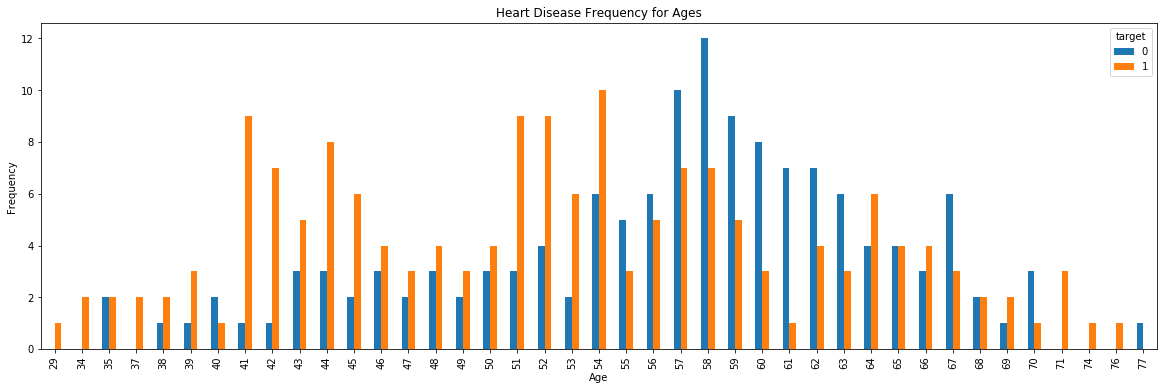

In [17]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

people in age group of 41 to 54 have more tendency of having a heart disease

## Analysis based on sex

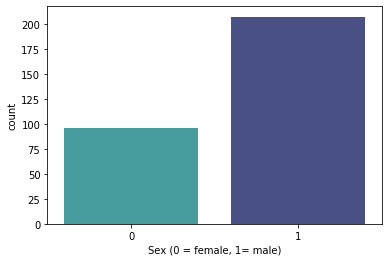

In [18]:
sns.countplot(x='sex', data=data, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [19]:
countFemale = len(data[data.sex == 0])
countMale = len(data[data.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(data.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(data.sex))*100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


## analysis based on sex

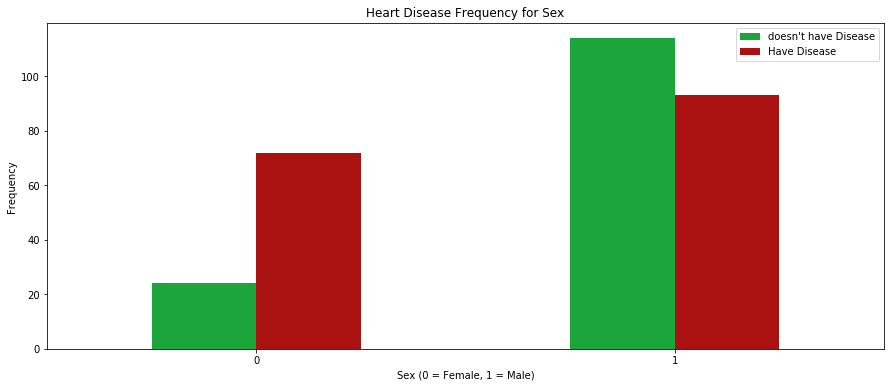

In [259]:

pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["doesn't have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

Females tend to have heart diseases more than males.

## analysis based on heart rate

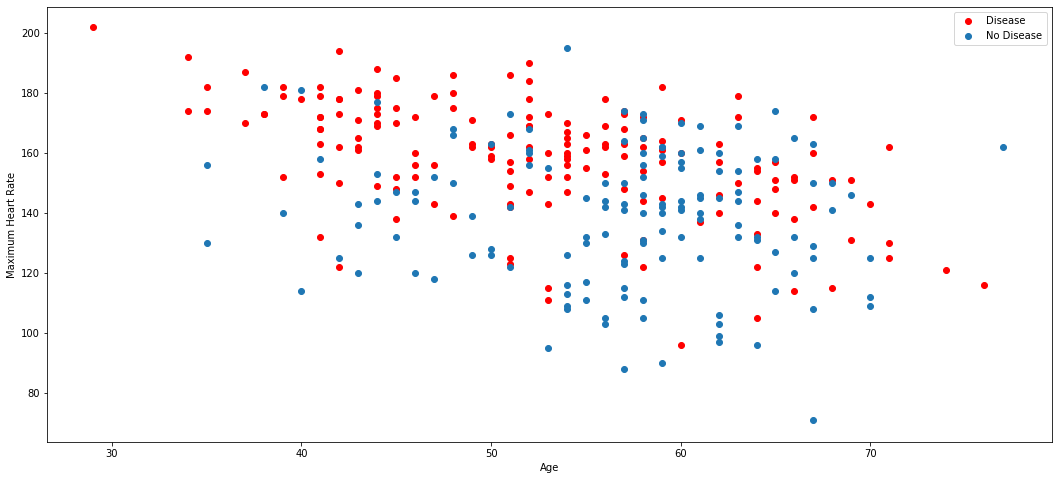

In [260]:


plt.scatter(x=data.age[data.target==1], y=data.thalach[(data.target==1)], c="red")
plt.scatter(x=data.age[data.target==0], y=data.thalach[(data.target==0)])
plt.legend(["Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

People having higher heart rates between age 40-55 have more tendency to have a heart disease

## Analysis based on blood sugar

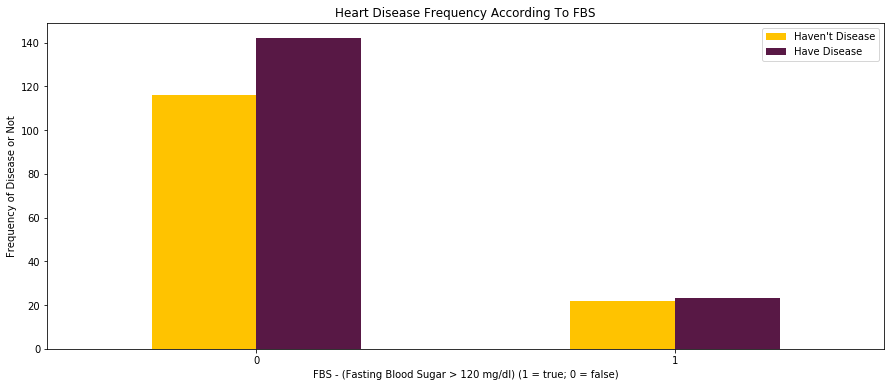

In [22]:

pd.crosstab(data.fbs,data.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

People with low blood sugars have higher probability og having a heart disease than people with high blood sugar

## Analysis based on chest pain

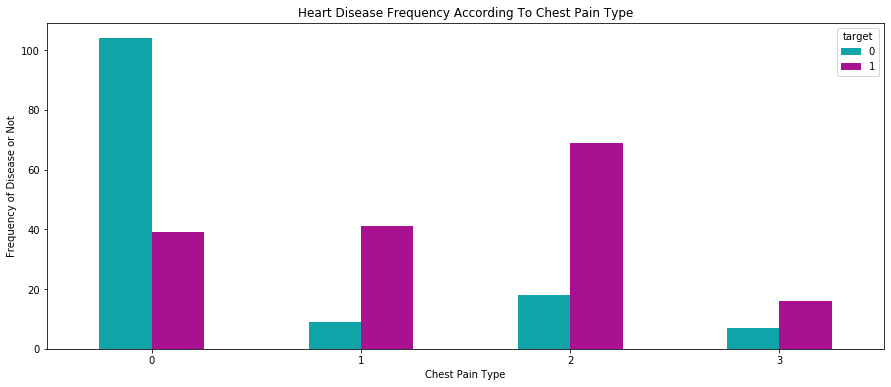

In [23]:

pd.crosstab(data.cp,data.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

People having chest pain of type 2 have highest probability of having a heart disease

• Do linear and logistic regression analysis on the data. Provide the appropriate
plots and interpretations.

## Linear Regression

In [24]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score, scorer
from sklearn.model_selection import train_test_split, cross_val_score

In [25]:
lr = LinearRegression(normalize=True

In [261]:
X = data.drop(['target'], axis = 1)

In [262]:
# Split dataset

X_train, X_test, y_train, y_test = train_test_split(
    X, data.target, test_size=0.1)

In [263]:
# Train the model

lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [264]:
# Make predictions using the testing set

y_pred = lr.predict(X_test)

In [265]:
lr.coef_

array([-0.00145905, -0.21293504,  0.11869614, -0.00183839, -0.00025763,
        0.00154064,  0.05687926,  0.00342922, -0.13712089, -0.05829918,
        0.05064062, -0.09908438, -0.10215372])

In [266]:
lr.intercept_

0.7728854516713612

In [267]:
print("Mean squared error: {:.2f}".format(
        mean_squared_error(y_test, y_pred)))

Mean squared error: 0.15


In [268]:
# Explained variance score: 1 is perfect prediction

print("Variance score: {:.2f}".format(
    r2_score(y_test, y_pred)))

Variance score: 0.39


In [269]:
lr.score(X_test, y_test)

0.3870679072955323

In [270]:
# CV score (10-fold validation)

scores = cross_val_score(lr, data, data.target, cv=10, scoring='r2')

In [35]:
y = data.target.values
X = data.drop(['target'], axis = 1)

In [36]:
lr = LinearRegression(normalize=True);

In [37]:
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [38]:
lr.coef_

array([-0.00082042, -0.19599555,  0.11270339, -0.00199097, -0.00035354,
        0.01737364,  0.04984795,  0.00301933, -0.14404593, -0.05878869,
        0.07897881, -0.10060216, -0.11903917])

In [271]:
y = data.target

y_pred = lr.predict(X)

In [272]:
print("Mean squared error: {:.2f}".format(
        mean_squared_error(y, y_pred)))

Mean squared error: 0.12


In [273]:
np.mean((y - y_pred)**2)

0.1203993973484366

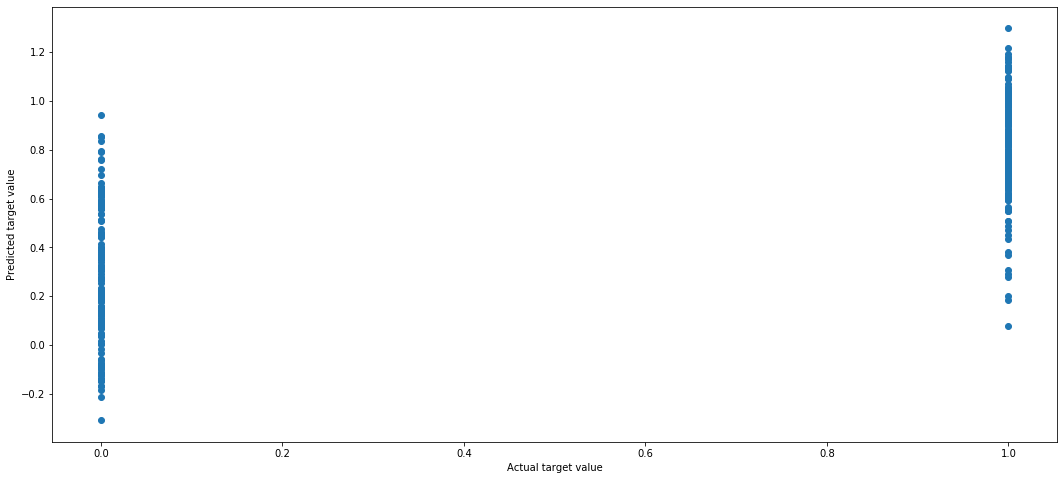

In [274]:
plt.scatter(y, y_pred)
plt.xlabel('Actual target value')
plt.ylabel('Predicted target value');

## Logistic Regression

In [275]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

from sklearn import metrics
logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial')

In [276]:
logreg.fit(X, y)

C:\Users\chait\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [277]:
data_probs = logreg.predict_proba(X)
data_probs

array([[0.18813269, 0.81186731],
       [0.31526518, 0.68473482],
       [0.06569616, 0.93430384],
       [0.07223481, 0.92776519],
       [0.17006344, 0.82993656],
       [0.24455051, 0.75544949],
       [0.20702185, 0.79297815],
       [0.15122611, 0.84877389],
       [0.20094115, 0.79905885],
       [0.06741501, 0.93258499],
       [0.35441237, 0.64558763],
       [0.0271451 , 0.9728549 ],
       [0.10773915, 0.89226085],
       [0.2469638 , 0.7530362 ],
       [0.02083795, 0.97916205],
       [0.0379925 , 0.9620075 ],
       [0.00845963, 0.99154037],
       [0.19655332, 0.80344668],
       [0.38584574, 0.61415426],
       [0.06102129, 0.93897871],
       [0.56730081, 0.43269919],
       [0.07405119, 0.92594881],
       [0.16156132, 0.83843868],
       [0.45608774, 0.54391226],
       [0.13223602, 0.86776398],
       [0.17002068, 0.82997932],
       [0.12792702, 0.87207298],
       [0.10617941, 0.89382059],
       [0.11296396, 0.88703604],
       [0.35847616, 0.64152384],
       [0.

In [46]:
data_pred = logreg.predict(X)
data_pred[:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [307]:
cm_lr=metrics.confusion_matrix(data.target, data_pred)
cm_lr

array([[106,  32],
       [ 12, 153]], dtype=int64)

In [351]:
print("Accuracy:",metrics.accuracy_score(data.target, data_pred))
acca=metrics.accuracy_score(data.target, data_pred)
accuracies={}
accuracies['Logistic Regression'] = acca

Accuracy: 0.8547854785478548


Using Principal Component Analysis, determine which attributes are important
for the analysis

## Principal Component Analysis

In [279]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)

X_r = pca.fit(X).transform(X)

X_r.shape

(303, 1)

In [280]:
X_r[0:5]

array([[-12.26734484],
       [  2.69013712],
       [-42.95021407],
       [-10.94475636],
       [106.97905333]])

In [281]:
np.zeros(X_r.shape[0])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

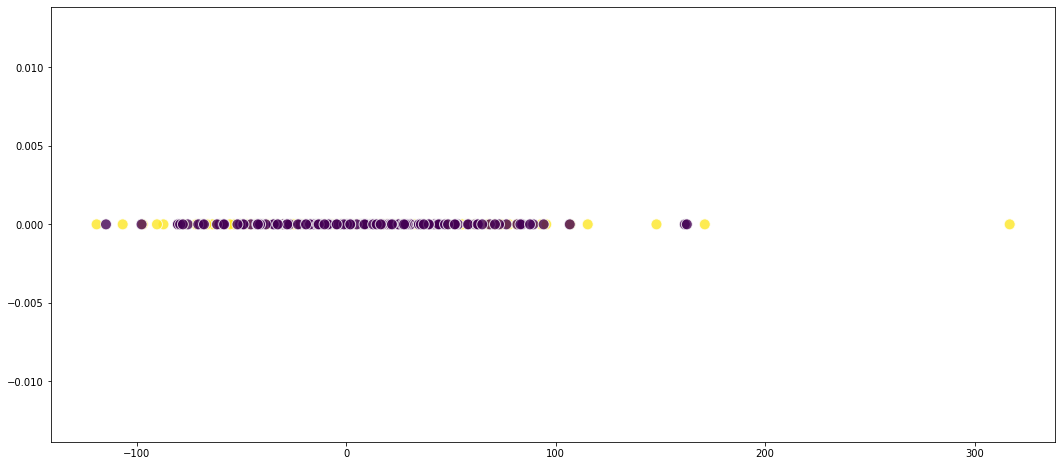

In [282]:
plt.scatter(X_r[:,0], np.zeros(X_r.shape[0]), c=data.target, 
            alpha=0.8, s=120,  marker='o', edgecolors='white');

In [283]:
print(pca.explained_variance_ratio_)

[0.7475642]


In [284]:
pca = PCA(n_components=2)

X_r = pca.fit(X).transform(X)

X_r.shape

(303, 2)

In [285]:
X_r[0:5]

array([[-12.26734484,   2.87383781],
       [  2.69013712, -39.87137362],
       [-42.95021407, -23.63681988],
       [-10.94475636, -28.43803577],
       [106.97905333, -15.87446784]])

In [286]:
pca.inverse_transform(X_r)[0:5]

array([[5.44058272e+01, 7.07319416e-01, 9.49810250e-01, 1.31338316e+02,
        2.33964738e+02, 1.48414689e-01, 5.43642277e-01, 1.46928850e+02,
        3.40678283e-01, 1.07484853e+00, 1.37060046e+00, 7.40421028e-01,
        2.30647965e+00],
       [4.72084762e+01, 6.46725377e-01, 1.46292452e+00, 1.27612732e+02,
        2.49723432e+02, 1.30408511e-01, 5.71807241e-01, 1.88588935e+02,
        2.74753389e-02, 3.27860443e-01, 1.81481710e+00, 3.30238034e-01,
        2.21334827e+00],
       [4.83651694e+01, 7.40978183e-01, 1.32946910e+00, 1.27126106e+02,
        2.03856572e+02, 1.32596341e-01, 6.23144647e-01, 1.73060548e+02,
        1.21195483e-01, 5.58423613e-01, 1.65009981e+00, 4.27374713e-01,
        2.20148111e+00],
       [4.87534251e+01, 6.80108433e-01, 1.34048778e+00, 1.28150769e+02,
        2.35892988e+02, 1.34103426e-01, 5.79230082e-01, 1.77516734e+02,
        1.05165970e-01, 5.14849907e-01, 1.69696288e+00, 4.25811976e-01,
        2.22686972e+00],
       [5.56957399e+01, 4.79847518e-

In [287]:
print(pca.explained_variance_ratio_)

[0.7475642  0.15037022]


• Perform classification analysis using Naïve Bayes, Decision trees, and Support
Vector machine algorithms. Provide the appropriate plots and interpretations

## Naive Bayes 

In [288]:
from sklearn.naive_bayes import GaussianNB

In [289]:
dataset = data.drop(['target'], axis = 1)

In [290]:
dataset[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [291]:
data.target[:5]

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [292]:
model = GaussianNB()

model.fit(dataset, data.target)
print(model)

GaussianNB(priors=None, var_smoothing=1e-09)


In [293]:
expected = data.target
predicted = model.predict(dataset)

In [294]:
expected.shape

(303,)

In [295]:
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
      .format(
          expected.shape[0],
          (expected != predicted).sum(),
          100*(1-(expected != predicted).sum()/expected.shape[0])
))

Number of mislabeled points out of a total 303 points : 48, performance 84.16%


In [296]:
print(metrics.confusion_matrix(expected, predicted))

[[110  28]
 [ 20 145]]


In [297]:
probs = model.predict_proba(dataset).round(2)

In [350]:
acc2=metrics.accuracy_score(data.target, predicted)
print("Accuracy:",acc1*100 ,"%")
accuracies['Naive Bayes'] = acc2

Accuracy: 84.15841584158416 %


In [298]:
probs[0:150,:]

array([[0.68, 0.32],
       [0.64, 0.36],
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.09, 0.91],
       [0.27, 0.73],
       [0.04, 0.96],
       [0.02, 0.98],
       [0.1 , 0.9 ],
       [0.01, 0.99],
       [0.06, 0.94],
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.63, 0.37],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.53, 0.47],
       [0.04, 0.96],
       [0.01, 0.99],
       [0.47, 0.53],
       [0.02, 0.98],
       [0.01, 0.99],
       [0.83, 0.17],
       [0.06, 0.94],
       [0.04, 0.96],
       [0.04, 0.96],
       [0.01, 0.99],
       [0.01, 0.99],
       [0.16, 0.84],
       [0.  , 1.  ],
       [0.27, 0.73],
       [0.  , 1.  ],
       [0.16, 0.84],
       [0.48, 0.52],
       [0.19, 0.81],
       [0.  , 1.  ],
       [0.15, 0.85],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.02, 0.98],
       [1.  , 0.  ],
       [0.05, 0.95],
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.  , 1.  ],
       [0.  ,

In [299]:
probs[150:300,:]

array([[0.92, 0.08],
       [0.16, 0.84],
       [0.22, 0.78],
       [0.02, 0.98],
       [0.  , 1.  ],
       [0.06, 0.94],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.09, 0.91],
       [0.07, 0.93],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.13, 0.87],
       [0.13, 0.87],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.94, 0.06],
       [1.  , 0.  ],
       [0.91, 0.09],
       [0.3 , 0.7 ],
       [0.29, 0.71],
       [0.98, 0.02],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.01, 0.99],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.01, 0.99],
       [0.87, 0.13],
       [1.  , 0.  ],
       [0.05, 0.95],
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.14, 0.86],
       [0.05, 0.95],
       [0.9 , 0.1 ],
       [1.  , 0.  ],
       [0.97, 0.03],
       [1.  , 0.  ],
       [0.76, 0.24],
       [1.  , 0.  ],
       [0.94, 0.06],
       [0.91,

## Support Vector Machines

In [300]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix

In [82]:
pca = PCA(n_components=5, svd_solver='randomized', whiten=True)

svc = SVC(kernel='rbf',  gamma=0.005, C=1000, class_weight='balanced')


model = Pipeline([('pca', pca),
                     ('svc', svc)])

In [83]:
Xtrain, Xtest, ytrain, ytest = train_test_split(dataset, data.target,
                                                random_state=42) 

In [84]:
model.fit(Xtrain, ytrain)

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=5,
                     random_state=None, svd_solver='randomized', tol=0.0,
                     whiten=True)),
                ('svc',
                 SVC(C=1000, cache_size=200, class_weight='balanced', coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=0.005,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [85]:
yfit = model.predict(Xtest)

In [88]:
confusion_matrix(ytest, yfit)

array([[30,  5],
       [ 6, 35]], dtype=int64)

In [349]:
acc3=metrics.accuracy_score(ytest, yfit)
print("Accuracy:",acc3*100)
accuracies['Support Vector Machine'] = acc3

Accuracy: 85.52631578947368


## Decision Tree

In [106]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz, plot_tree

In [108]:
clf = DecisionTreeClassifier()
clf1 = clf.fit(dataset, data.target)

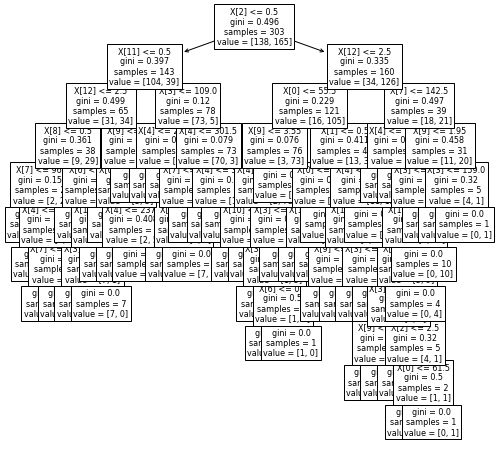

In [193]:
plt.figure(figsize=(8,8))
tree.plot_tree(clf1, fontsize=8);

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

In [111]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((212, 13), (91, 13), (212,), (91,))

In [112]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [113]:
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1], dtype=int64)

In [114]:
clf.predict_proba(X_test)

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [348]:
acc4=metrics.accuracy_score(data.target, predicted)
print("Accuracy:",acc4*100)
accuracies['Decision Tree'] = acc4

Accuracy: 84.15841584158416


In [135]:
feature_names = data.columns[:-1]
feature_names

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [136]:
class_column = data.columns[-1]
class_column

'target'

In [137]:
class_names = data[class_column].unique()
class_names

array([1, 0], dtype=int64)

In [138]:
X = data[feature_names]

In [139]:
y = data[class_column]


In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

In [141]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [142]:
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1], dtype=int64)

In [323]:
from sklearn import tree
fn=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
cn=['1', '0']


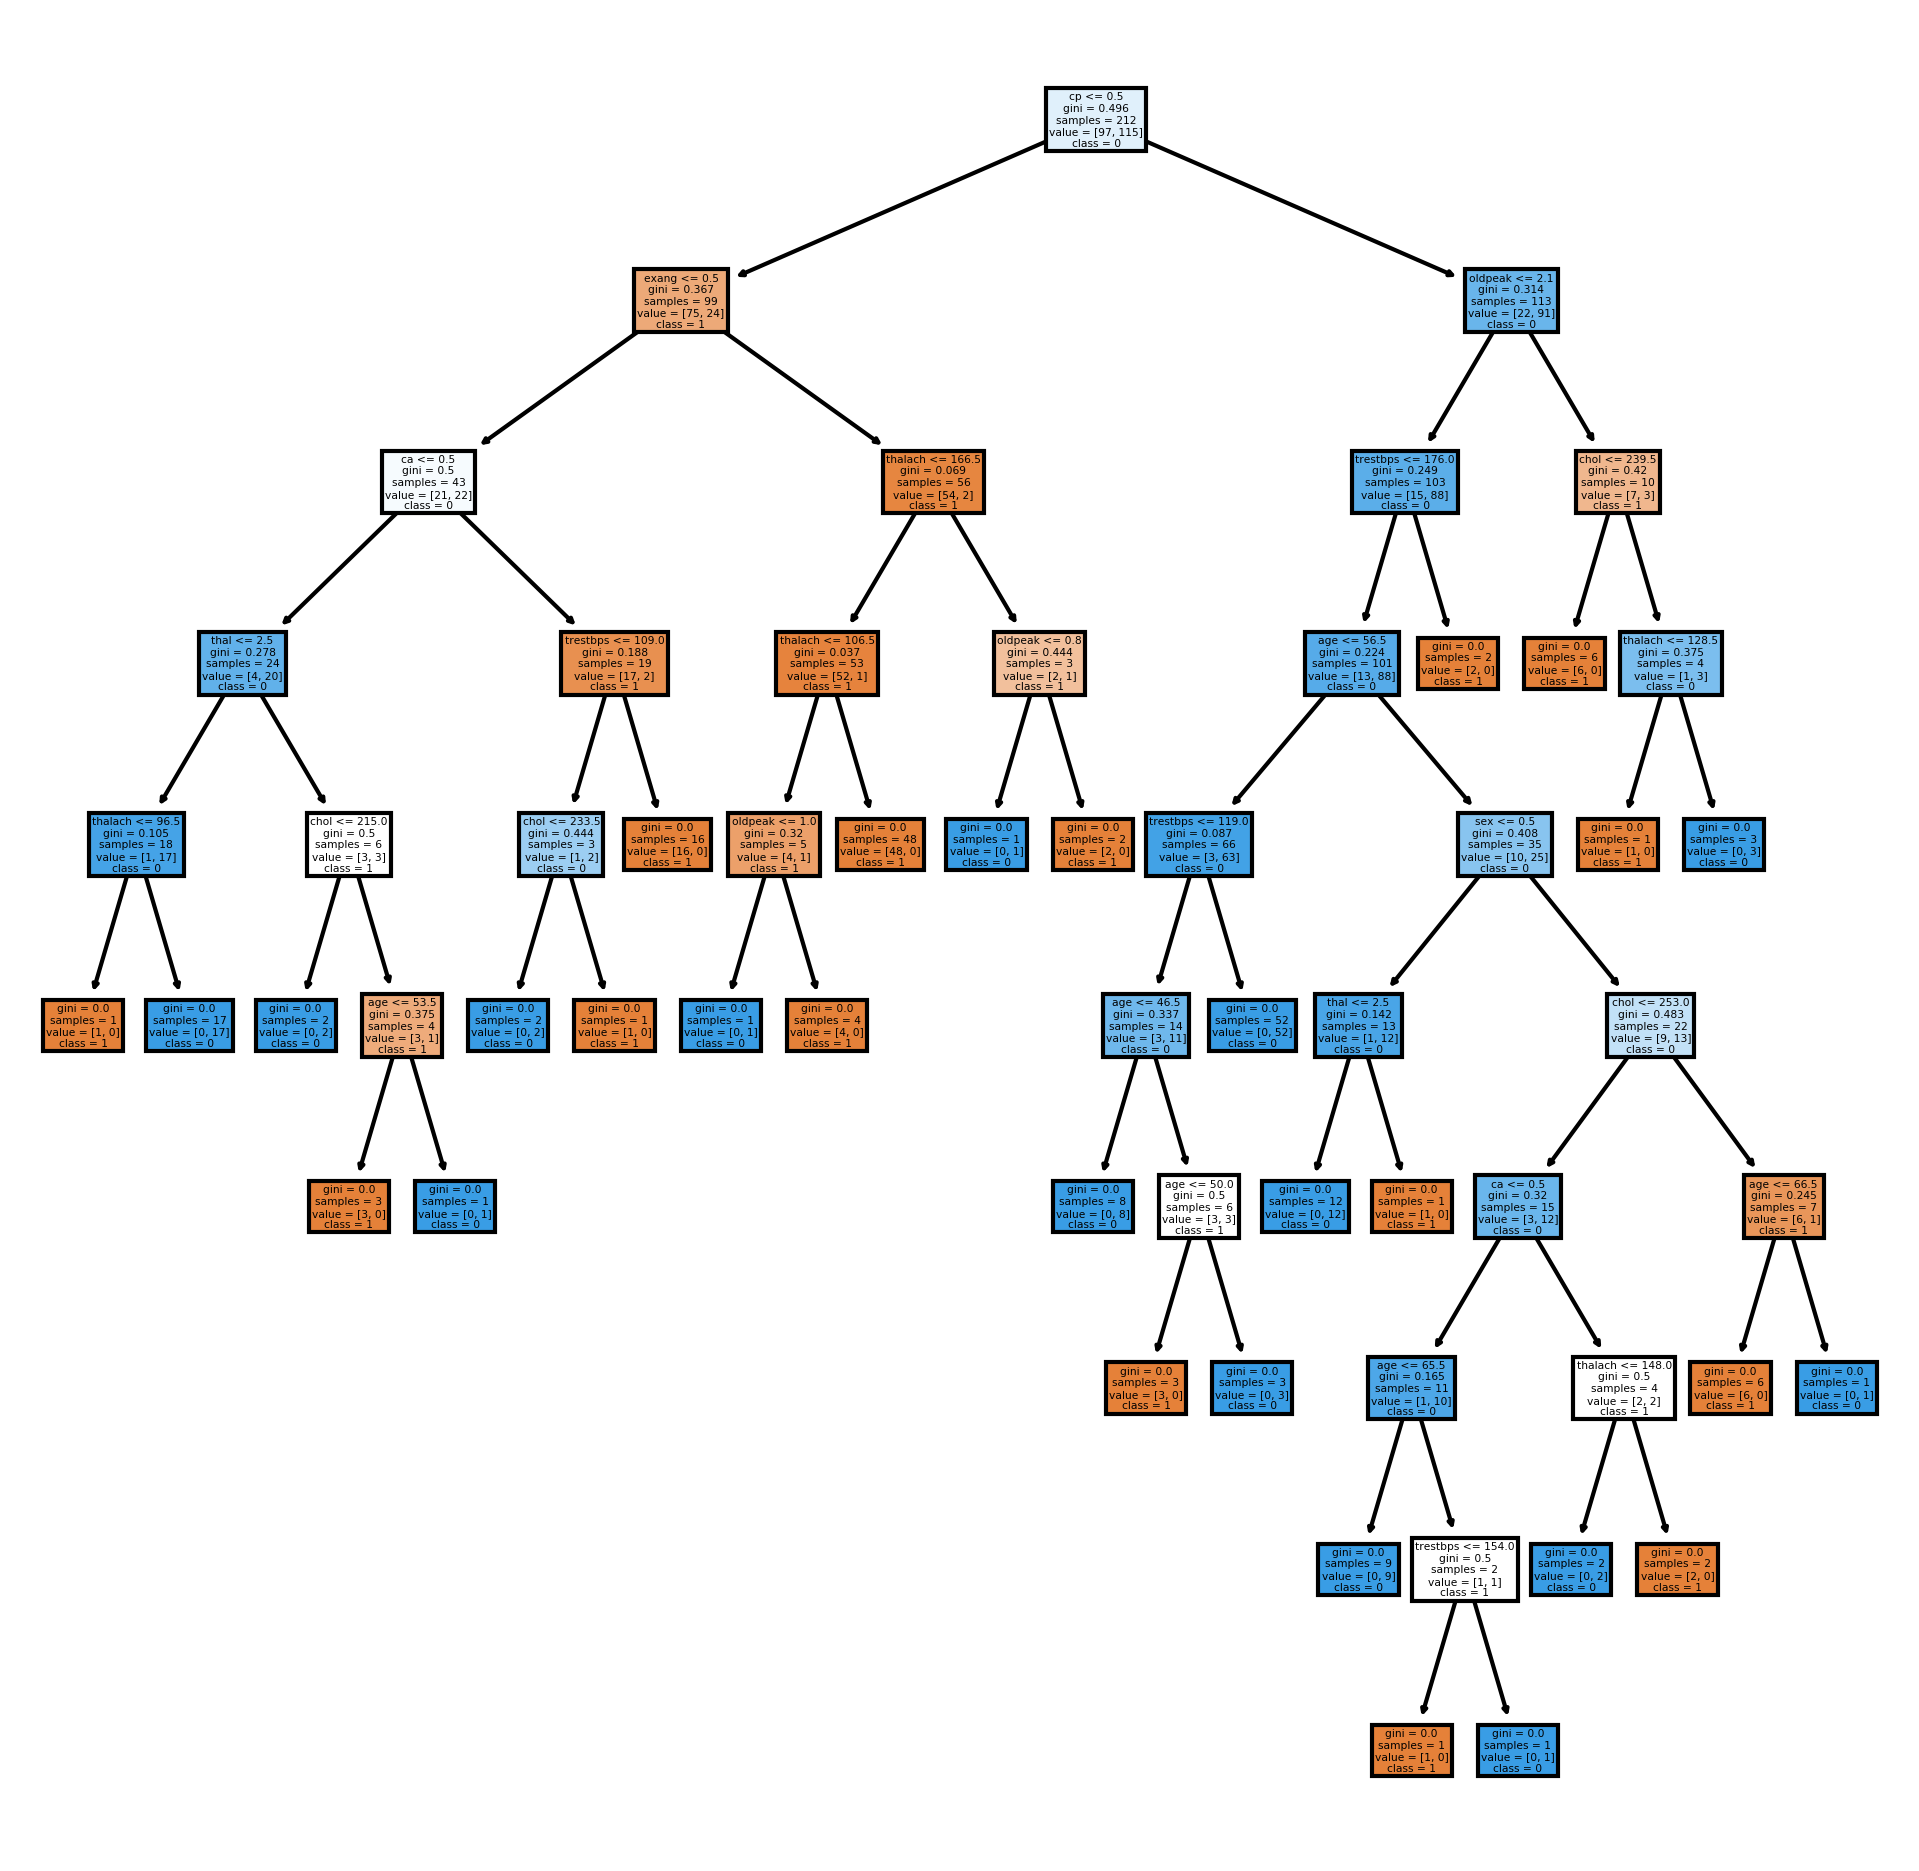

In [192]:

fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(8,8),dpi=300)
tree.plot_tree(clf,feature_names=fn,class_names=cn,filled=True);


Do the clustering techniques on the dataset. Provide the appropriate plots and
interpretations.


## KMeans Clustering

In [160]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)

kmeans.fit(X)

y_kmeans = kmeans.predict(X)

In [172]:
y_kmeans

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [173]:
kmeans.fit_transform(X)

array([[ 67.19520768,  25.01545765],
       [ 67.13690983,  51.4234444 ],
       [ 99.8177445 ,  26.55493304],
       [ 72.22951756,  34.35161545],
       [ 59.62819596, 138.60538877],
       [107.07432562,  26.9763034 ],
       [ 10.1711503 ,  78.48947035],
       [ 49.12713681,  53.03887432],
       [107.90950387,  46.81414761],
       [134.76448119,  57.00160812],
       [ 61.84788325,  26.31500512],
       [ 26.8673294 ,  60.36307   ],
       [ 42.44112423,  53.47904449],
       [ 91.72345555,  24.58510253],
       [ 27.40638824,  70.70323231],
       [ 82.48444442,  12.36499791],
       [ 51.0114348 , 125.86508079],
       [ 81.57534124,  45.96214834],
       [ 61.19124364,  42.74336796],
       [ 61.6595604 ,  29.74019301],
       [ 66.72022406,  21.55796289],
       [ 75.04824102,  33.22868965],
       [ 81.20794368,  31.79831051],
       [ 58.77306996,  37.56264422],
       [106.4266727 ,  35.56973319],
       [ 33.30222936,  93.25012724],
       [ 88.96634669,  22.21846108],
 

In [161]:
print(kmeans.labels_)

[0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1
 0 1 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1
 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0
 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0
 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 0 0
 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0
 0 0 0 1 0 0 0]


In [162]:
centers = kmeans.cluster_centers_
print(centers)

[[5.30621762e+01 7.40932642e-01 1.05181347e+00 1.29746114e+02
  2.16259067e+02 1.55440415e-01 5.75129534e-01 1.51818653e+02
  2.84974093e-01 9.73575130e-01 1.40932642e+00 6.68393782e-01
  2.25906736e+00]
 [5.66545455e+01 5.81818182e-01 8.18181818e-01 1.34918182e+02
  2.98909091e+02 1.36363636e-01 4.45454545e-01 1.45836364e+02
  4.00000000e-01 1.15545455e+00 1.38181818e+00 8.36363636e-01
  2.40909091e+00]]


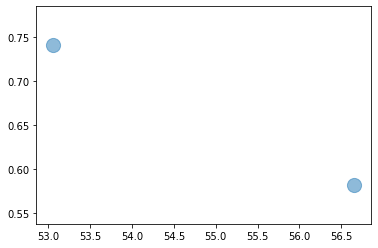

In [170]:
plt.scatter(centers[:, 0], centers[:, 1],s=200,alpha=0.5)

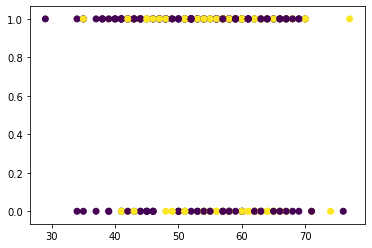

In [166]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=kmeans.labels_)